# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [70]:
medical.shape

(1338, 8)

In [71]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

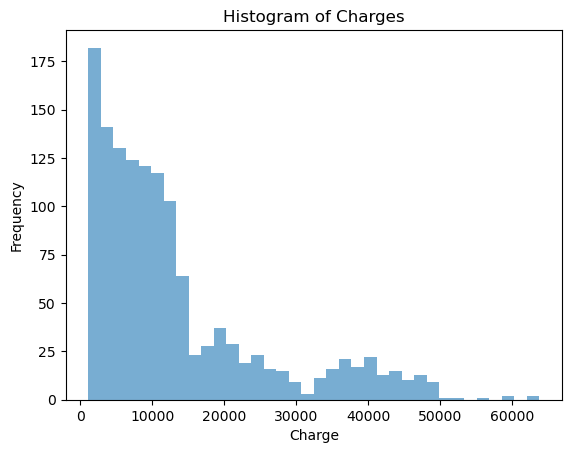

In [72]:
charges = medical['charges']
bins = int(np.sqrt(len(charges)))

plt.hist(charges, bins=bins, alpha = 0.6)
plt.title('Histogram of Charges')
plt.xlabel('Charge')
plt.ylabel('Frequency')

plt.show()

In [73]:
charges_mean = np.mean(charges)
charges_std = np.std(charges)

print(f"Mean: {charges_mean}")
print(f"Std: {charges_std}")

Mean: 13270.422265141257
Std: 12105.484975561605


A1: Comment on the appropriateness of these statistics:  
--> The histogram shows that this distribution is not a normal distribution, and mean is less informative as the distribution is skewed.  
--> The StdDev is also questionable, because usually it measures how spread out the numbers are assuming the distribution is symmetrical around the mean.  In our case the distribution is NOT symmetrical around the mean. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [74]:
charges_meadian = np.median(charges)

print(charges_meadian)

9382.033


__A:__

Given that our sample mean is about 13,270 and the StdDev is about 12,000 it is not unreasonable to believe the actual average charge has fallen below 12,000.  
  
In order to justify that the given data allow us to present a strong case to what range the actual mean lies within, we would rely on the Central Imit Theorem (CLT), which states that if you have a population with mean mu and standard deviation sigma, and take sufficiently large random samples from the population, then the distribuition of the sample means will be approximately normally distributed.  
  
We can use a one-sided T-Test since we want to see if our actual mean is less than 12,000.  Our null hypothesis is that the mean charge is 12,000, and the alternative hypothesis is that the actual mean charge is less than 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

A one sided would be best because we only want to know if our actual mean charge has fallen below 12,000.

In [75]:
# Collect our series of interest
charges = medical['charges']
charges_mean = np.mean(charges)
charges_std = np.std(charges, ddof=1)

# Sample size
n = len(charges)

# Calculate the DoF
df = n - 1

# Calculate the sample standard error
se = charges_std / np.sqrt(n)

# Calculate the t critical value for a 95% one-sided confidence interval. 
t_crit = t.ppf(0.95, df)

# Calculate the margin of error
me = t_crit * se

# Calculate the lower limit of the one-sided 95% confidence interval
ci_lower_limit = charges_mean - me
print(f"The lower limit 95% confidence interval is: {ci_lower_limit}")


The lower limit 95% confidence interval is: 12725.48718381623


A: Given the data and our lower limit of the one-sided 95% confidence interval, the Admin should not be concerned.  
--> We are 95% confident that the true average charge is greater than 12,725  
--> Because this limit is HIGHER than 12,000 ... we can say we are 95% confident that the true average charge has not fallen below $12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
A1.  
The Null Hypothesis is that "there is no significant difference between the charges for people with insurance and those without insurance". This implies that the mean charge for the two groups is equal.  
  
The Alternative hypothesis is that "there is a significant difference between the charges for people with insurance and those without insurance". This implies that the mean charge for the two groups is not equal. 

We are assuming the variances of the two groups are equal. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [76]:
charges_with_insurance = medical[medical['insuranceclaim'] == 1]['charges']
charges_without_insurance = medical[medical['insuranceclaim'] == 0]['charges']
print(charges_with_insurance.describe())
print(charges_without_insurance.describe())

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64
count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64


In [77]:
n0 = len(charges_with_insurance)
n1 = len(charges_without_insurance)

s0 = np.std(charges_with_insurance, ddof=1)
s1 = np.std(charges_without_insurance, ddof=1)

# Calculate the pooled standard deviation
s_pooled = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2) / (n0 + n1 - 2))

# Calculate the test statistic
t_stat_manual = (np.mean(charges_with_insurance) - np.mean(charges_without_insurance)) / (s_pooled * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
df = n0 + n1 - 2

# p value
p_value_manual = 2 * (1 - t.cdf(np.absolute(t_stat_manual), df))

print(f"Manually calculated t_stat is {t_stat_manual}")
print(f"Manually calculated p-value is {p_value_manual}")


Manually calculated t_stat is 11.893299030876715
Manually calculated p-value is 0.0


In [78]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(charges_with_insurance, charges_without_insurance)

print(f"Function calculated t_stat is {t_stat_manual}")
print(f"Function calculated p-value is {p_value_manual}")

Function calculated t_stat is 11.893299030876715
Function calculated p-value is 0.0


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
I couldn't find an equivalent z-test to perform on a sample.  This is because a z-test is used if the population variance is known, however if the sample size is larger than 30 then a z-test and t-test results can begin to converge. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test